# WeRateDogs - Project #4 

### A Data Wrangling Project looking at the popularity of dogs of Twitter users

## Gather. 
### Data from three sources:

- The Twitter archive #WeRateDogs, a csv file that contains the tweet, rating, dog name, and dog 'stage' in life (such as puppy). 
    - `File Name will be "twitter.df"`
    

- An 'image prediction' file, or what breed of dog is in each tweet, according to a neural network machine learning model.  The image prediction file will be downloaded programmatically from Udacity's servers using the Requests library.
    - `File Name will be "twi_pre.df"`
    

- Twitter's API to gather retweet count and favorite count, two columns missing in the Twitter archive. I set up a developer account with Twitter and use their Tweepy API for each tweet's JSON data using Python's Tweepy library. Tweepy is Twitter's RESTful API to access data about both Twitter users and what they are tweeting about.
    - `File Name will be "scraped.df"`

# Assess
### Assess the data based on quality and tidiness:

- Low quality (‘dirty’) data has content issues such as missing, invalid, inaccurate, and inconsistent data. 
- Untidy (‘messy’) data has structural issues. 

I'll be looking across the 3 datasets for these issues.

# Clean 

- Convert each assessment observations into action items. 
- Each item was **defined**, **coded**, and **tested** to ensure the problem was fixed. 
- First addressed missing data, then structural issues, then quality issues. 

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')


Consumer API keys
izAwRVtKWnGOzfTrCJccxr8YV (API key)

PXbwYG2uldnhAHy2WZcZpPkMdnnkCGvOMb2D4wAhklaIuJfGpW (API secret key)

Access token & access token secret


1196997497547182081-wNCq4MW49EmTQ6AiZKA9ouYht9Uduw (Access token)

sYeBGORtqk3DzlfB4JzPQbnsOWASezj0XRyEEUTofLeHe (Access token secret)

In [2]:
# Import the Twitter archive CSV file into a DataFrame (twitter_df)
twitter_df = pd.read_csv('/Users/tommy/Udacity/twitter-archive-enhanced.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    


In [4]:
# Import the tweet image predictions TSV file into a DataFrame
twi_pred_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
#check DataFrame

twi_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#Scrape Twitter for dog tweet data

consumer_key ='izAwRVtKWnGOzfTrCJccxr8YV'
consumer_secret = 'PXbwYG2uldnhAHy2WZcZpPkMdnnkCGvOMb2D4wAhklaIuJfGpW'
access_token = '1196997497547182081-wNCq4MW49EmTQ6AiZKA9ouYht9Uduw'
access_token_secret = 'sYeBGORtqk3DzlfB4JzPQbnsOWASezj0XRyEEUTofLeHe'
try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
except tweepy.TweepError as t:
    print(t.message)

### NOTE: The following cell is commented out since it already ran

In [7]:
# Grab the tweets by tweet_id from the twitter_df DataFrame, query the Twitter API for each tweet's JSON
#api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)
#tweets = twitter_df['tweet_id']

#tweet_data = []
#for tweet_id in tweets:
#    try:
#        temp = api.get_status(tweet_id)._json
#        tweet_data.append({'tweet_id':temp['id'],
#                           'created_at':temp['created_at'],
#                           'favorite_count':temp['favorite_count'],
#                           'favorited':temp['favorited'],
#                           'retweet_count':temp['retweet_count'],
#                           'retweeted':temp['retweeted']})
#        print(str(tweet_id) + ': done')
#    except tweepy.TweepError as t:
#        print('{} : {}'.format(tweet_id, t))

In [8]:
#json.dump(tweet_data,open('tweet_data.txt', 'w', encoding="utf8"), ensure_ascii=False, indent=4)
#print('completed')

In [9]:
#read json file into a DataFrame and review
with open('tweet_data.txt','r') as f:
    data = json.load(f)
scraped_df = pd.DataFrame(data)
scraped_df.head()

,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,36894,False,7858,False,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,31749,False,5828,False,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,23923,False,3853,False,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,40207,False,8034,False,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,38405,False,8682,False,891327558926688256


## We now have data from our 3 data source and will assess the data to continue the Data Wrangling process.



# Assess The Data
The three data frames are
- twitter_df:  
- twi_pred_df: 
- scraped_df: 

# File #1: Twitter Archive

# Twitter Info
**`twitter_df`** (Twitter archive) columns:

- **tweet_id:** the unique identifier for each tweet
- **in_reply_to_status_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- **timestamp:** time when this Tweet was created
- **source:** utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text:** actual UTF-8 text of the status update
- **retweeted_status_id:** if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- **retweeted_status_user_id:** if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- **retweeted_status_timestamp:** time of retweet
- **expanded_urls:** tweet URL
- **rating_numerator:** numerator of the rating of a dog. Note: ratings almost always greater than 10
- **rating_denominator:** denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- **name:** name of the dog
- **doggo:** one of the 4 dog "stage"
- **floofer:** one of the 4 dog "stage"
- **pupper:** one of the 4 dog "stage"
- **puppo:** one of the 4 dog "stage"

In [10]:
# Visually assess the Tweet archive
twitter_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_df.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
twitter_df.shape

(2356, 17)

In [13]:
twitter_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
307,835685285446955009,NaN,NaN,2017-02-26 02:57:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rory. He's got an inter...,7.869631e+17,4.196984e+09,2016-10-14 16:13:10 +0000,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None
579,800513324630806528,NaN,NaN,2016-11-21 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chef. Chef loves everyone and wants ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800513324...,11,10,Chef,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
162,860524505164394496,NaN,NaN,2017-05-05 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He likes to dance. Doesn't care ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860524505...,13,10,Carl,None,None,None,None
1183,718939241951195136,NaN,NaN,2016-04-09 23:10:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. Everybody look at Otis. 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718939241...,12,10,Otis,None,None,None,None
977,750011400160841729,NaN,NaN,2016-07-04 17:00:26 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,doggo,None,None,None
893,759446261539934208,NaN,NaN,2016-07-30 17:51:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",No no no this is all wrong. The Walmart had to...,NaN,NaN,NaN,https://twitter.com/wsaznews/status/7591675587...,10,10,None,None,None,None,None
1364,702899151802126337,NaN,NaN,2016-02-25 16:53:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to Luna. Her tongue is malfunctionin...,NaN,NaN,NaN,https://vine.co/v/i6iIrBwnTFI,12,10,Luna,None,None,None,None
1569,687807801670897665,NaN,NaN,2016-01-15 01:25:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper &amp; Maya. Trooper protects Maya...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687807801...,11,10,Trooper,None,None,None,None
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None


In [14]:
# Review a few tweets
pd.set_option('display.max_colwidth', -1)
twitter_df['text'].head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

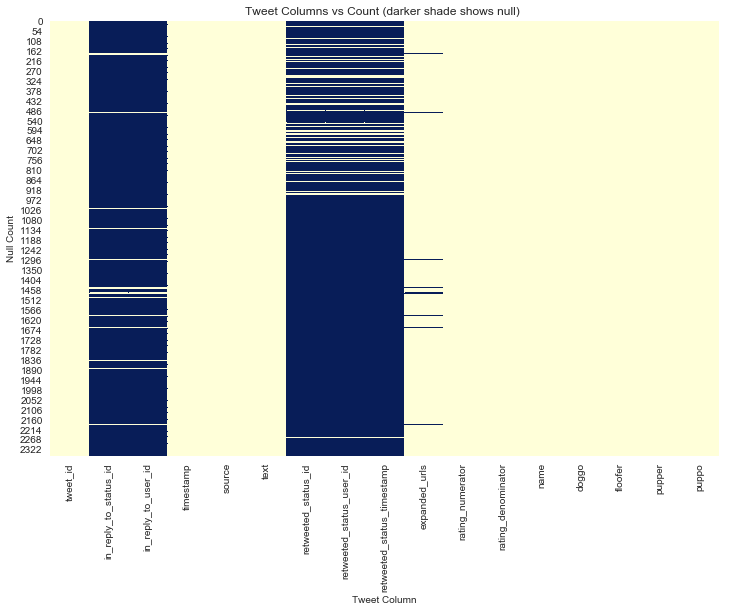

In [15]:
# Get a graphical look at nulls. This was a good way to have a visual view of columns that had some amount of missing data
#plt.xlabel("Colors")
#plt.ylabel("Values")
#plt.title("Colors vs Values") # You can comment this line out if you don't need title
#plt.show(fig)

plt.figure(figsize=(12,8))
fig = sns.heatmap(twitter_df.isnull(), cbar=False, cmap="YlGnBu");
plt.xlabel("Tweet Column")
plt.ylabel("Null Count")
plt.title("Tweet Columns vs Count (darker shade shows null) ") # You can comment this line out if you don't need title
plt.show(fig)

In [16]:
# check the datatypes and find some datatypes need to be fixed. "In reply" and "retweet" columns missing a lot of data
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
# total missing values for each features
twitter_df.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [18]:
# Some of the names just have a word like "a" or "the" I noticed. Will want to address that.
twitter_df.name.str.islower().sum()

109

In [19]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# 10 is the standard rating_denominator, other numbers could be either errors or just part of exuberant and/or tongue-in-cheek rating system
twitter_df.rating_denominator.value_counts()


10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [21]:
# Some extreme values such as 420, 1776 could be errors. Since the numerator variety of values was considered 
# part of fun here, I'll just leave these. 
# Potentially I could add a column that looks at the numbers that are higher than 10 and give some sort of
# "Enthusiasm Factor" column or something like that.

twitter_df.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [22]:
# main source is iphone but the urls are easily readable; will want to work on this.
twitter_df.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

One last check via Pandas Profiling. I use this as a "backup check" here. I wanted to use the more basic Panda functions (info(), describe(), etc) to get a visual/programmatic assessment. But in day to day work, I'd also use this tool as a quick "one-stop" place to get a lot of info in one place

I'll just use this on the first data set to compare what I get from this tool vs. the other Python functions just used

In [23]:
!pip install pandas_profiling

In [24]:
#Bring in the profiling library and run
import pandas_profiling


pandas_profiling.ProfileReport(twitter_df)

# File #2: Image Predictions

`twi_pred_df` Tweet image predictions columns from the neural network machine learning model:

- tweet_id: the unique identifier for each tweet
- jpg_url: dog's image URL
- img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- p1: algorithm's #1 prediction for the image in the tweet
- p1_conf: how confident the algorithm is in its #1 prediction
- p1_dog: whether or not the #1 prediction is a breed of dog
- p2: algorithm's #2 prediction for the image in the tweet
- p2_conf: how confident the algorithm is in its #2 prediction
- p2_dog: whether or not the #2 prediction is a breed of dog
- p3: algorithm's #3 prediction for the image in the tweet
- p3_conf: how confident the algorithm is in its #3 prediction
- p3_dog: whether or not the #3 prediction is a breed of dog



In [25]:
twi_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
twi_pred_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [27]:
twi_pred_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Staffordshire_bullterrier    20 
German_shepherd              20 
Siberian_husky               20 
web_site                     19 
Cardigan                     19 
Shetland_sheepdog            18 
Eskimo_dog                   18 
beagle                       18 
teddy                        18 
Maltese_dog                  18 
Shih-Tzu                     17 
Rottweiler                   17 
Lakeland_terrier             17 
kuvasz                       16 
Italian_greyhound            16 
          

In [28]:
# all variables have 2075 records; no missing values here
twi_pred_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
twi_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


# File #3: Tweet Data from Screen Scraping
`scraped_df`(tweet status) columns:

- created_at: timestamp
- favorite_count: indicates approximately how many times this Tweet has been liked by Twitter users
- favorited: was it a favorite tweet
- retweet_count: number of times this Tweet has been retweeted
- retweeted: was it retweeted
- tweet_id: the unique identifier for each tweet



In [30]:
scraped_df.head()


,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,36894,False,7858,False,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,31749,False,5828,False,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,23923,False,3853,False,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,40207,False,8034,False,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,38405,False,8682,False,891327558926688256


In [31]:
scraped_df.tail()

,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
2328,Mon Nov 16 00:24:50 +0000 2015,99,False,41,False,666049248165822465
2329,Mon Nov 16 00:04:52 +0000 2015,279,False,134,False,666044226329800704
2330,Sun Nov 15 23:21:54 +0000 2015,118,False,43,False,666033412701032449
2331,Sun Nov 15 23:05:30 +0000 2015,121,False,44,False,666029285002620928
2332,Sun Nov 15 22:32:08 +0000 2015,2465,False,474,False,666020888022790149


In [32]:
# Top 5 retweet_count records

scraped_df.sort_values(['retweet_count'], ascending= 0)[0:5]


,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
1017,Sat Jun 18 18:26:18 +0000 2016,159411,False,79529,False,744234799360020481
1057,Sat Jun 04 23:31:25 +0000 2016,117714,False,58954,False,739238157791694849
517,Fri Dec 09 06:17:20 +0000 2016,123107,False,58023,False,807106840509214720
397,Sat Jan 21 18:26:02 +0000 2017,135899,False,44869,False,822872901745569793
65,Mon Jun 26 19:07:24 +0000 2017,101111,False,41404,False,879415818425184262


In [33]:
# Check any duplicates
tweet_data = scraped_df.drop_duplicates()
#tweet_data

In [34]:
scraped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 6 columns):
created_at        2333 non-null object
favorite_count    2333 non-null int64
favorited         2333 non-null bool
retweet_count     2333 non-null int64
retweeted         2333 non-null bool
tweet_id          2333 non-null int64
dtypes: bool(2), int64(3), object(1)
memory usage: 77.5+ KB


In [35]:
# All numbers the same, no duplicates
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2332
Data columns (total 6 columns):
created_at        2333 non-null object
favorite_count    2333 non-null int64
favorited         2333 non-null bool
retweet_count     2333 non-null int64
retweeted         2333 non-null bool
tweet_id          2333 non-null int64
dtypes: bool(2), int64(3), object(1)
memory usage: 95.7+ KB


### End of assessment

Now I can review this area and decide on the plan of action for cleaning.

A few observations in general:

- The dog name column has a variety of issues (missing name, identifiers like "a" or "the"), but I also found some info that the owner of the Twitter account would sometimes change the owners dog name to something else. A real controversy! (https://slate.com/technology/2018/06/weratedogs-twitter-account-criticized-for-renaming-dogs.html) As you can read, that was done to influence potential "voting" based on dog name. Interesting, and brings up some deeper thoughts on the influence of the veracity of data on social media. :-) (a topic not to be examined in this project). One thing I know I want to analyze are the most popular names, but it's worth noting this in terms of the data. I think it would be interesting to be able to know if the dog name was changed (I don't believe that is something that could be queried).

- There are indeed a lot of potential quality and tideness issues here. For the sake of this project, I'll just analyze 2 tidy and 8 quality. But given that potential imact that Tweets have as a sort of social barometer, it's worth noting that there is a lot of work that can be done on both the quality and veracity of the data.

# Cleaning Plan Summary


## Tidiness Issues
- Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive should belong to one column called "stage". 
- The tweet_data table and image prediction table need to merge into the twitter_archive table.

Both following the recommendations of the "Tidy Data" paper by Hadly Wickham. "Each variable is a column and each observation is a row.


# Quality Issues
### twitter_archive table (twitter.df)
- There are some rows that have "retweet_status_values", which means a duplicate tweet. The need to be removed
- Some columns have huge amount of missing values, for example, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp". For this analysis, these columns are not needed so will be dropped. FYI, all of these columns had missing data at 90% and above.
- The variable "expanded_urls" also has few missing values, which means some records had no images. Any ratings without images will be removed for this analysis. FYI: There were 2.5% missing (59 records).
    - Note: Regarding dropping data, my view is that either the source data still remains intact someplace and/or the lineage can be traced for a given field. In this project, the above fields mentioned are not needed for the purposes of this analysis. However, the scope of the analysis should also be understood before dropping data. 
- The datatype of "timestamp" is not correct.
- Simplify!  Change the long url links to more readable values
- The standard for "rating_denominator" is 10, but it includes some other numbers, which could be the misparse.
- The "rating_numerator" also has some incorrect values. NOTE: I decided not to change the value here in keeping with the idea that "owner exuberance" should be both noted and celebrated. Who doesn't think their dog is 1,000,000 out of 10! :-)
- The dog names are sometimes first letter capital but sometimes not. Keep the name format consistent.

### image_predictions table (twi_pred)
- The columns'names are not clear and straightforward such as p1,p2. Rename to something easier
- The prediction dog breeds involve both uppercase and lowercase for the first letter.

Note: I identified the table names where I saw the quality issue, however since I'll be doing a merge of the three tables into a single table, the image prediction tables cleaning will be done on that merged table. 

# Part 3. Clean Data

The three data frames are
- twitter_df:  
- twi_pred_df: 
- scraped_df:

In [142]:
# make copies for cleaning
twitter_archive_clean = twitter_df.copy()
image_predictions_clean = twi_pred_df.copy()
tweet_data_clean = scraped_df.copy()

In [143]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [144]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [145]:
# I know there are a lot of values of "none" in the "dog stage" column, but wanted to make sure I have the 
# count. 97+10+257+30 = 394
# Not a lot of the dog stage provided, but still a good field for further analysis
twitter_archive_clean.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [146]:
twitter_archive_clean.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [147]:
twitter_archive_clean.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [148]:
twitter_archive_clean.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [149]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [150]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [151]:
tweet_data_clean.head(2)

,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,36894,False,7858,False,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,31749,False,5828,False,892177421306343426


In [152]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 6 columns):
created_at        2333 non-null object
favorite_count    2333 non-null int64
favorited         2333 non-null bool
retweet_count     2333 non-null int64
retweeted         2333 non-null bool
tweet_id          2333 non-null int64
dtypes: bool(2), int64(3), object(1)
memory usage: 77.5+ KB


### Quality issue #1:


If "retweeted_status_id" contains a non-null, that is a duplicate tweet. Need to remove these before the merge

#### Code

In [153]:
# Get number of non nulls, then clean

len(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == False])

181

In [154]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [155]:
len(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == False])

0

## Twitter_archive table


Tidiness Issue 1: 
- Create a new variable – ‘stage’ to contain the "category" type of dog, drop the four columns, and fill the empty with NaN.


In [156]:
# Check for "none" values in the "Doggo"
twitter_archive_clean[twitter_archive_clean['doggo'] == 'None'].head(2)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [157]:
# use a for loop to replace all the 'None' before concatentation
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')



In [158]:
# use str.cat to concatenate 
twitter_archive_clean['stage'] = twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)

# drop the four old colomns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.nan)

## Test

In [159]:
# Make sure that clean operation completed successfully
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


In [160]:
# Make sure we didn't lose any data. The difference of 181 is due to the retweets we delete in Quality #1 above
print(twitter_archive_clean.shape)
print(twitter_df.shape)

(2175, 14)
(2356, 17)


In [161]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         344 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


## Tidiness Issue 2 

Define : Join the tweet_data and image predictions into the twitter_archive using inner join to create a "master table". Easier to analyze and more functional from a tidiness and potential performance issue. 

Note: This was helpful in making sure to understand differences between merge, join, and concatenate in Python: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [162]:
# merge three tables on 'tweet_id' and use inner join method
# first merge

twitter_archive_clean_temp = pd.merge(twitter_archive_clean, tweet_data_clean, on='tweet_id', how = 'inner')

In [163]:
twitter_archive_clean_temp.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,created_at,favorite_count,favorited,retweet_count,retweeted
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,Tue Aug 01 16:23:56 +0000 2017,36894,False,7858,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,Tue Aug 01 00:17:27 +0000 2017,31749,False,5828,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,Mon Jul 31 00:18:03 +0000 2017,23923,False,3853,False
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,Sun Jul 30 15:58:51 +0000 2017,40207,False,8034,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,Sat Jul 29 16:00:24 +0000 2017,38405,False,8682,False


In [164]:
# Second merge
twitter_archive_clean_temp2 = pd.merge(twitter_archive_clean_temp, image_predictions_clean, on='tweet_id', how = 'inner')

In [165]:
twitter_archive_clean_temp2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [166]:
# copy back temp to 
twitter_archive_clean = twitter_archive_clean_temp2

## Test

In [167]:
twitter_archive_clean.tweet_id.count()

1987

In [168]:
# drop the duplicates due to join
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

In [169]:
# Sanity check
print(twitter_archive_clean.tweet_id.count())
print(tweet_data.tweet_id.count())
print(scraped_df.tweet_id.count())

1987
2333
2333


In [170]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 30 columns):
tweet_id                      1987 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
stage                         305 non-null object
created_at                    1987 non-null object
favorite_count                1987 non-null int64
favorited                     1987 non-null bool
retweet_count                 1987 non-nul

In [171]:
# Eyeball the joined table
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


This is the end of the Tideness phase. Prior to starting this Udacity/IBM course, I wasn't familiar with the concept of tidy data as formalized process. It's a good way to get data in a functionally useful format; I'm more used to normalizing data and/or getting data sources that have been curated and already cleaned. 

Looking at the new table created via the Pandas join, looks more aestically pleasing along with being more useful with the dog stage condensed to one column as well as having just a single table instead of two to reference. 

I found this to be a helpful reference on Tidy data: https://tomaugspurger.github.io/modern-5-tidy.html


#### On to the Quality issues...

### Quality Issue 2 

Define : Remove all the unnecessary columns directly ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id)¶

#### Code

In [172]:
# drop the columns unnecessary and contain huge amount of missing data
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

twitter_archive_clean = twitter_archive_clean.drop(columns_drop, axis = 1)

#### Test

In [173]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 25 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
stage                 305 non-null object
created_at            1987 non-null object
favorite_count        1987 non-null int64
favorited             1987 non-null bool
retweet_count         1987 non-null int64
retweeted             1987 non-null bool
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p

In [174]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1932,667044094246576128,2015-11-18 18:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094246576128/photo/1,12,10,None,NaN,Wed Nov 18 18:17:59 +0000 2015,...,1,golden_retriever,0.765266,True,Labrador_retriever,0.206694,True,seat_belt,0.010667,False
103,867774946302451713,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Harold. He's h*ckin cooperative. 13/10 good work Harold https://t.co/ZYg3NZGICa,"https://twitter.com/dog_rates/status/867774946302451713/photo/1,https://twitter.com/dog_rates/status/867774946302451713/photo/1",13,10,Harold,NaN,Thu May 25 16:10:44 +0000 2017,...,2,Border_collie,0.661953,True,Cardigan,0.175718,True,collie,0.087142,True
1827,668932921458302977,2015-11-23 23:23:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Herald. He likes to swing. Subtle tongue slip. Owner good at b-ball. Creepy person on bench back there. 9/10 https://t.co/rcrKkL7eB6,https://twitter.com/dog_rates/status/668932921458302977/photo/1,9,10,Herald,NaN,Mon Nov 23 23:23:31 +0000 2015,...,1,standard_poodle,0.237638,True,Old_English_sheepdog,0.195573,True,toy_poodle,0.144658,True
1436,677565715327688705,2015-12-17 19:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Contortionist pup here. Inside pentagram. Clearly worships Satan. Known to slowly push fragile stuff off tables 6/10 https://t.co/EX9oR55VMe,https://twitter.com/dog_rates/status/677565715327688705/photo/1,6,10,None,NaN,Thu Dec 17 19:07:09 +0000 2015,...,1,basset,0.397295,True,Welsh_springer_spaniel,0.199554,True,purse,0.105641,False
832,733822306246479872,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently https://t.co/mVfqRdppTL,https://twitter.com/dog_rates/status/733822306246479872/photo/1,10,10,Moose,floofer,Sat May 21 00:50:46 +0000 2016,...,1,Lhasa,0.457356,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True


### Quality Issue 3 

Define : Remove the records with no images information ('expanded_urls' is NaN)

In [175]:
# Drop the 59 records without images. This was 2.5% of the Expanded URL's column
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['expanded_urls'])

#### Test

In [176]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

### Quality Issue 4

Define : Change the datatype of 'timestamp' to datetime


#### Code

In [177]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [178]:
twitter_archive_clean['timestamp'].head(3)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
Name: timestamp, dtype: datetime64[ns]

### Quality Issue 5

Define : Optimize the source content by ‘Twitter for iphone’, ‘Vine - Make a Scene’, ‘Twitter Web Client’, and ‘TweetDeck’.

Note: I'd expected to see more different type of sources for Twitter. I checked on the Twitter documentation, there are others that could come in as well depending on the source ("Twitter for Android" for example). Our data just has the 4 mentioned. 

In [179]:
# View the four types of source: Twitter for iphone / Vine - Make a Scene / Twitter Web Client / TweetDeck
twitter_archive_clean['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1949
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    10  
Name: source, dtype: int64

In [180]:
twitter_archive_clean['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [181]:
# simpfy the source contexts
       
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

# change the type of source to category for preparing later visualization
#twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

In [182]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 25 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null datetime64[ns]
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
stage                 305 non-null object
created_at            1987 non-null object
favorite_count        1987 non-null int64
favorited             1987 non-null bool
retweet_count         1987 non-null int64
retweeted             1987 non-null bool
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null f

#### Test

In [183]:
twitter_archive_clean['source'].value_counts()

Twitter for iphone    1949
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

In [184]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1805,669353438988365824,2015-11-25 03:14:30,Twitter for iphone,This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,NaN,Wed Nov 25 03:14:30 +0000 2015,...,1,teddy,0.379656,False,Pembroke,0.212343,True,chow,0.096995,True
1643,672272411274932228,2015-12-03 04:33:27,Twitter for iphone,This is Pippin. He is terrified of his new little yellow giraffe. 11/10 https://t.co/ZICNl6tIr5,"https://twitter.com/dog_rates/status/672272411274932228/photo/1,https://twitter.com/dog_rates/status/672272411274932228/photo/1",11,10,Pippin,NaN,Thu Dec 03 04:33:27 +0000 2015,...,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
766,744971049620602880,2016-06-20 19:11:53,Twitter for iphone,Say hello to Indie and Jupiter. They're having a stellar day out on the boat. Both 12/10 adorbz af https://t.co/KgSEkrPA3r,"https://twitter.com/dog_rates/status/744971049620602880/photo/1,https://twitter.com/dog_rates/status/744971049620602880/photo/1,https://twitter.com/dog_rates/status/744971049620602880/photo/1",12,10,Indie,NaN,Mon Jun 20 19:11:53 +0000 2016,...,1,toy_poodle,0.497755,True,golden_retriever,0.282017,True,miniature_poodle,0.090032,True
371,813051746834595840,2016-12-25 16:00:16,Twitter for iphone,This is Bauer. He had nothing to do with the cookies that disappeared. 13/10 very good boy https://t.co/AIMF8ouzvl,https://twitter.com/dog_rates/status/813051746834595840/photo/1,13,10,Bauer,NaN,Sun Dec 25 16:00:16 +0000 2016,...,1,golden_retriever,0.914804,True,Labrador_retriever,0.083550,True,kuvasz,0.000453,True
890,720775346191278080,2016-04-15 00:46:48,Twitter for iphone,This is Berkeley. He's in a predicament. 10/10 someone help him https://t.co/XSEXdQupej,https://twitter.com/dog_rates/status/720775346191278080/photo/1,10,10,Berkeley,NaN,Fri Apr 15 00:46:48 +0000 2016,...,1,Newfoundland,0.489970,True,groenendael,0.174497,True,giant_schnauzer,0.079067,True


### Quality Issue 6 

Define : 10 is a customary value for denominator for We Rate Dogs. At least I think so based on what I could find out from the account on Twitter. I spent a lot of time (probably a lot more than needed) trying to figure out how to best handle the outliers. I considered a few strategies:

- Set an arbitrary cut off point, like anything > 100 made sense since some rankings are "out of 100"
- Create a ratio where the every numerator was set to 10
- Keep the values in a just have them be part of the analysis

As well, there are descrepancies where the text of the Tweet shows a different ranking than the reported one. I decided to ignore that since we don't have a analysis rule that says how to handle that. As in which takes precedence, the text ranking (if one exists) or the rating given. 

In the end, I decided to just remove them since there are not a lot of them. As well, we'll see that there are similar inconsistences with the numerators. 

One other thought: As a dog lover and owner, I'd also rate my dogs about 1000 out of 10 anyway!

#### Code

In [185]:
# We've got a lot of ratings > 10, but not a crazy number of them so we can handle selectively

twitter_archive_clean.rating_denominator.value_counts()


10     1969
50     3   
80     2   
11     2   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
7      1   
2      1   
Name: rating_denominator, dtype: int64

In [186]:

df1_tmp = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]
twitter_archive_clean = twitter_archive_clean.drop(df1_tmp.index, axis=0)

#### Test

In [187]:

twitter_archive_clean.rating_denominator.value_counts()

10    1969
Name: rating_denominator, dtype: int64

#### Numerator Issues

Decided to keep the numerators as is. Have a common base for the denominator is good for keeping a common look to the denominator. I think the numerator values, however wild, keep with the theme of showing owner exhuberance.

#### Code

In [188]:
twitter_archive_clean.rating_numerator.value_counts()

12      448
10      418
11      396
13      257
9       150
8       95 
7       51 
14      35 
5       33 
6       32 
3       19 
4       15 
2       9  
1       4  
0       2  
420     1  
26      1  
27      1  
75      1  
1776    1  
Name: rating_numerator, dtype: int64

### Quality Issue #7

### Define: Change prediction field names to more readable values

#### Code

In [189]:
twitter_archive_clean= twitter_archive_clean.rename(columns={'p1':'Breed_Probability1', 'p2':'Breed_Probability2', 'p3':'Breed_Probability3'})
twitter_archive_clean= twitter_archive_clean.rename(columns={'p1_conf':'Breed_Confidence1', 'p2_conf':'Breed_Confidence2', 'p3_conf':'Breed_Confidence3'})
twitter_archive_clean= twitter_archive_clean.rename(columns={'p1_dog':'Dog_Flag_1', 'p2_dog':'Dog_Flag_2', 'p3_dog':'Dog_Flag_3'})


#### Test

In [190]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,created_at,...,img_num,Breed_Probability1,Breed_Confidence1,Dog_Flag_1,Breed_Probability2,Breed_Confidence2,Dog_Flag_2,Breed_Probability3,Breed_Confidence3,Dog_Flag_3
431,799063482566066176,2016-11-17 01:35:54,Twitter for iphone,This is Mister. He only wears the most fashionable af headwear. 11/10 h*ckin stylish https://t.co/BXJFKOVnJm,"https://twitter.com/dog_rates/status/799063482566066176/photo/1,https://twitter.com/dog_rates/status/799063482566066176/photo/1,https://twitter.com/dog_rates/status/799063482566066176/photo/1,https://twitter.com/dog_rates/status/799063482566066176/photo/1",11,10,Mister,NaN,Thu Nov 17 01:35:54 +0000 2016,...,2,Norfolk_terrier,0.334436,True,Norwich_terrier,0.231573,True,Australian_terrier,0.214203,True
202,842115215311396866,2017-03-15 20:48:07,Twitter for iphone,This is Bentley. It's his first time going to the beach. I think he's a fan. 12/10 would build sand castles with https://t.co/iDK4OyQJoy,"https://twitter.com/dog_rates/status/842115215311396866/photo/1,https://twitter.com/dog_rates/status/842115215311396866/photo/1,https://twitter.com/dog_rates/status/842115215311396866/photo/1",12,10,Bentley,NaN,Wed Mar 15 20:48:07 +0000 2017,...,1,chow,0.293493,True,Newfoundland,0.181336,True,schipperke,0.125152,True
1108,698703483621523456,2016-02-14 03:01:06,Twitter for iphone,This is Rusty. He has no respect for POULTRY products. Unbelievable af. 7/10 would still pet https://t.co/hEH19t1eFp,https://twitter.com/dog_rates/status/698703483621523456/photo/1,7,10,Rusty,NaN,Sun Feb 14 03:01:06 +0000 2016,...,1,Brittany_spaniel,0.931963,True,Welsh_springer_spaniel,0.030695,True,beagle,0.012896,True
1298,684200372118904832,2016-01-05 02:30:55,Twitter for iphone,Gang of fearless hoofed puppers here. Straight savages. Elevated for extra terror. Front one has killed before 6/10s https://t.co/jkCb25OWfh,https://twitter.com/dog_rates/status/684200372118904832/photo/1,6,10,None,NaN,Tue Jan 05 02:30:55 +0000 2016,...,1,llama,0.681347,False,ram,0.120142,False,hog,0.043686,False
1529,674790488185167872,2015-12-10 03:19:24,Twitter for iphone,ER... MER... GERD 13/10 https://t.co/L1puJISV1a,https://twitter.com/dog_rates/status/674790488185167872/photo/1,13,10,None,NaN,Thu Dec 10 03:19:24 +0000 2015,...,1,Labrador_retriever,0.801903,True,Chesapeake_Bay_retriever,0.193575,True,Rottweiler,0.001193,True


### Quality Issue #8

#### Define: Dog Names should be cleaned up. 

Some dog names were null, but the general pattern is the first names that start with a lower case is something other than the actual name. It's more like an honorific. 
I.E. "a Hound" could be a name field value. So I'll concentrate on cleaning those names that start with a lower case

#### Code

In [191]:
twitter_archive_clean['name'].value_counts()


None        534
a           54 
Charlie     10 
Oliver      10 
Cooper      10 
Lucy        9  
Penny       9  
Tucker      9  
Sadie       8  
Winston     8  
Lola        7  
Daisy       7  
Toby        7  
the         7  
Jax         6  
Bella       6  
Koda        6  
Bo          6  
Stanley     6  
Rusty       5  
Chester     5  
Leo         5  
Scout       5  
Bailey      5  
Louis       5  
Oscar       5  
an          5  
Buddy       5  
Milo        5  
Dave        5  
           ..  
Bayley      1  
Geno        1  
Nollie      1  
Luna        1  
Jameson     1  
Ronnie      1  
Glacier     1  
Brady       1  
Remus       1  
Emma        1  
Aldrick     1  
Tango       1  
Arlo        1  
Humphrey    1  
Dale        1  
Kona        1  
Mark        1  
Quinn       1  
Marlee      1  
Meyer       1  
Bobby       1  
Ralphie     1  
Bauer       1  
Tycho       1  
Donny       1  
Kingsley    1  
Mutt        1  
Mason       1  
space       1  
Fizz        1  
Name: name, Length: 931,

In [192]:
#find those values which start with a capital letter
pd.set_option('display.max_colwidth', -1)
lc_vals = twitter_archive_clean[~twitter_archive_clean['name'].str[0].str.isupper()]['name'].value_counts()
lc_vals.keys()

Index(['a', 'the', 'an', 'one', 'very', 'just', 'quite', 'getting',
       'infuriating', 'such', 'my', 'actually', 'all', 'his', 'by', 'not',
       'officially', 'unacceptable', 'incredibly', 'space', 'light'],
      dtype='object')

I'm just going to take out 'a', 'an', and 'the'. This is a little subjective, since they might actually be part
of the dogs name, but for this exercise I'll just concentrate on these.

However, in the "real world" I'd want to make sure that changing a field as important as name that I would make sure that was well documented. Especially if it would have the potential to affect any analysis on that field


In [193]:
for val in lc_vals.keys():
    twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(val,'None')
    
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('a','None')
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('an','None')
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('the','None')

#### Test

In [194]:
twitter_archive_clean['name'].value_counts()

None        629
Oliver      10 
Charlie     10 
Cooper      10 
Penny       9  
Tucker      9  
Lucy        9  
Sadie       8  
Winston     8  
Daisy       7  
Toby        7  
Lola        7  
Bo          6  
Jax         6  
Stanley     6  
Bella       6  
Koda        6  
Scout       5  
Rusty       5  
Louis       5  
Oscar       5  
Chester     5  
Milo        5  
Buddy       5  
Bailey      5  
Leo         5  
Dave        5  
Cassie      4  
Sophie      4  
Gary        4  
           ..  
Biden       1  
Bayley      1  
Geno        1  
Shelby      1  
Luna        1  
Jameson     1  
Ronnie      1  
Brady       1  
Banjo       1  
Tango       1  
Kona        1  
Arlo        1  
Humphrey    1  
Dale        1  
Clyde       1  
Mark        1  
Quinn       1  
Marlee      1  
Aldrick     1  
Ralphie     1  
Remus       1  
Meyer       1  
Tycho       1  
Donny       1  
Kingsley    1  
Mutt        1  
Mason       1  
Bauer       1  
Emma        1  
Nollie      1  
Name: name, Length: 910,

### End of cleaning

Now on to Analysis

## Store the cleaned file


In [195]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')

# Analysis

### First set: Basic check on tweet source and dog stages

Twitter for iphone    1931
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64


Text(0.5, 1.0, 'Source of Tweets')

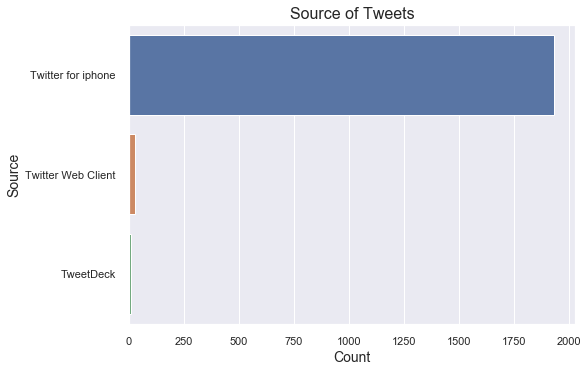

In [204]:
# Let's check where the most tweets came from.
# No surprise, Tweets from a mobile device (iPhone) were most predominant
sorted_source = twitter_archive_clean['source'].value_counts().index
print(twitter_archive_clean['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('Source of Tweets',fontsize=16)

Text(0.5, 1.0, 'Dog Stage')

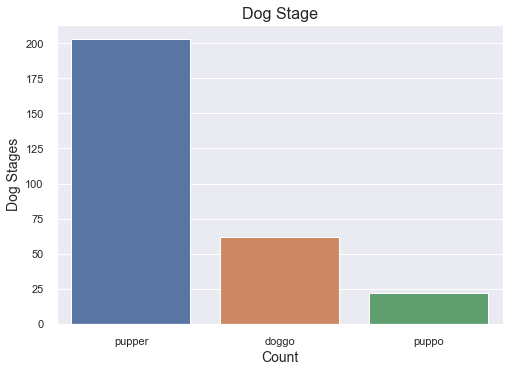

In [205]:
# Dog Stages
sorted_stage = twitter_archive_clean['stage'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, x = 'stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('Dog Stage',fontsize=16)

### Second set: Correlation Analysis

In [206]:
twitter_archive_clean.corr(method='pearson')

# `retweet_count` is positively correlates with `favorite_count` : r^2 = 0.759

,tweet_id,rating_numerator,rating_denominator,favorite_count,favorited,retweet_count,retweeted,img_num,Breed_Confidence1,Dog_Flag_1,Breed_Confidence2,Dog_Flag_2,Breed_Confidence3,Dog_Flag_3
tweet_id,1.000000,0.028161,NaN,0.612643,NaN,0.384927,NaN,0.212887,0.104723,0.119313,-0.003142,0.123304,-0.046606,0.096246
rating_numerator,0.028161,1.000000,NaN,0.021854,NaN,0.022929,NaN,0.000121,-0.009006,-0.029368,-0.013958,-0.034490,-0.004890,-0.030728
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,0.612643,0.021854,NaN,1.000000,NaN,0.928910,NaN,0.126750,0.071424,0.045857,-0.017400,0.051783,-0.048283,0.037080
favorited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.384927,0.022929,NaN,0.928910,NaN,1.000000,NaN,0.100655,0.049042,0.005463,-0.014903,0.011853,-0.040765,0.009209
retweeted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,0.212887,0.000121,NaN,0.126750,NaN,0.100655,NaN,1.000000,0.205515,0.031754,-0.156929,0.051984,-0.141161,0.062098
Breed_Confidence1,0.104723,-0.009006,NaN,0.071424,NaN,0.049042,NaN,0.205515,1.000000,0.124765,-0.509463,0.141515,-0.708688,0.117597
Dog_Flag_1,0.119313,-0.029368,NaN,0.045857,NaN,0.005463,NaN,0.031754,0.124765,1.000000,0.110783,0.634237,0.048182,0.557557


In [207]:
#Color negative numbers red
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

# Hightlight large numbers
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max() 
    #print("s", s)
    return ['background-color: yellow' if v else '' for v in is_max]
# Create correlation matrix:

corr = twitter_archive_clean.corr()
corr.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,tweet_id,rating_numerator,rating_denominator,favorite_count,favorited,retweet_count,retweeted,img_num,Breed_Confidence1,Dog_Flag_1,Breed_Confidence2,Dog_Flag_2,Breed_Confidence3,Dog_Flag_3
tweet_id,1,0.0281614,nan,0.612643,nan,0.384927,nan,0.212887,0.104723,0.119313,-0.00314208,0.123304,-0.0466059,0.0962462
rating_numerator,0.0281614,1,nan,0.0218537,nan,0.0229292,nan,0.00012122,-0.00900576,-0.0293685,-0.0139583,-0.0344897,-0.0048904,-0.0307279
rating_denominator,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
favorite_count,0.612643,0.0218537,nan,1,nan,0.92891,nan,0.12675,0.0714239,0.0458569,-0.0174005,0.0517827,-0.0482826,0.03708
favorited,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
retweet_count,0.384927,0.0229292,nan,0.92891,nan,1,nan,0.100655,0.0490425,0.00546333,-0.0149035,0.0118532,-0.0407651,0.00920928
retweeted,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
img_num,0.212887,0.00012122,nan,0.12675,nan,0.100655,nan,1,0.205515,0.0317539,-0.156929,0.0519836,-0.141161,0.0620984
Breed_Confidence1,0.104723,-0.00900576,nan,0.0714239,nan,0.0490425,nan,0.205515,1,0.124765,-0.509463,0.141515,-0.708688,0.117597
Dog_Flag_1,0.119313,-0.0293685,nan,0.0458569,nan,0.00546333,nan,0.0317539,0.124765,1,0.110783,0.634237,0.0481824,0.557557


In [208]:
#This was helpful: https://datascienceplus.com/visualize-correlation-matrices-in-python/

corr = twitter_archive_clean.corr()
corr.style.background_gradient(cmap='coolwarm')
#corr.style.background_gradient(cmap='BrBG')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,tweet_id,rating_numerator,rating_denominator,favorite_count,favorited,retweet_count,retweeted,img_num,Breed_Confidence1,Dog_Flag_1,Breed_Confidence2,Dog_Flag_2,Breed_Confidence3,Dog_Flag_3
tweet_id,1,0.0281614,nan,0.612643,nan,0.384927,nan,0.212887,0.104723,0.119313,-0.00314208,0.123304,-0.0466059,0.0962462
rating_numerator,0.0281614,1,nan,0.0218537,nan,0.0229292,nan,0.00012122,-0.00900576,-0.0293685,-0.0139583,-0.0344897,-0.0048904,-0.0307279
rating_denominator,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
favorite_count,0.612643,0.0218537,nan,1,nan,0.92891,nan,0.12675,0.0714239,0.0458569,-0.0174005,0.0517827,-0.0482826,0.03708
favorited,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
retweet_count,0.384927,0.0229292,nan,0.92891,nan,1,nan,0.100655,0.0490425,0.00546333,-0.0149035,0.0118532,-0.0407651,0.00920928
retweeted,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
img_num,0.212887,0.00012122,nan,0.12675,nan,0.100655,nan,1,0.205515,0.0317539,-0.156929,0.0519836,-0.141161,0.0620984
Breed_Confidence1,0.104723,-0.00900576,nan,0.0714239,nan,0.0490425,nan,0.205515,1,0.124765,-0.509463,0.141515,-0.708688,0.117597
Dog_Flag_1,0.119313,-0.0293685,nan,0.0458569,nan,0.00546333,nan,0.0317539,0.124765,1,0.110783,0.634237,0.0481824,0.557557


In [214]:
# Highlight largest number in column. This turned out to be the most helpful table to highlight the most relevant
# correlations
corr = twitter_archive_clean.corr()
corr.style.highlight_max(axis=1)

,tweet_id,rating_numerator,rating_denominator,favorite_count,favorited,retweet_count,retweeted,img_num,Breed_Confidence1,Dog_Flag_1,Breed_Confidence2,Dog_Flag_2,Breed_Confidence3,Dog_Flag_3
tweet_id,1,0.0281614,nan,0.612643,nan,0.384927,nan,0.212887,0.104723,0.119313,-0.00314208,0.123304,-0.0466059,0.0962462
rating_numerator,0.0281614,1,nan,0.0218537,nan,0.0229292,nan,0.00012122,-0.00900576,-0.0293685,-0.0139583,-0.0344897,-0.0048904,-0.0307279
rating_denominator,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
favorite_count,0.612643,0.0218537,nan,1,nan,0.92891,nan,0.12675,0.0714239,0.0458569,-0.0174005,0.0517827,-0.0482826,0.03708
favorited,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
retweet_count,0.384927,0.0229292,nan,0.92891,nan,1,nan,0.100655,0.0490425,0.00546333,-0.0149035,0.0118532,-0.0407651,0.00920928
retweeted,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
img_num,0.212887,0.00012122,nan,0.12675,nan,0.100655,nan,1,0.205515,0.0317539,-0.156929,0.0519836,-0.141161,0.0620984
Breed_Confidence1,0.104723,-0.00900576,nan,0.0714239,nan,0.0490425,nan,0.205515,1,0.124765,-0.509463,0.141515,-0.708688,0.117597
Dog_Flag_1,0.119313,-0.0293685,nan,0.0458569,nan,0.00546333,nan,0.0317539,0.124765,1,0.110783,0.634237,0.0481824,0.557557


In [215]:
#f = plt.figure(figsize=(35, 35))
#plt.matshow(twitter_archive_clean.corr(), fignum=f.number)
#plt.xticks(range(twitter_archive_clean.shape[1]), twitter_archive_clean.columns, fontsize=14, rotation=45)
#plt.yticks(range(twitter_archive_clean.shape[1]), twitter_archive_clean.columns, fontsize=14)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

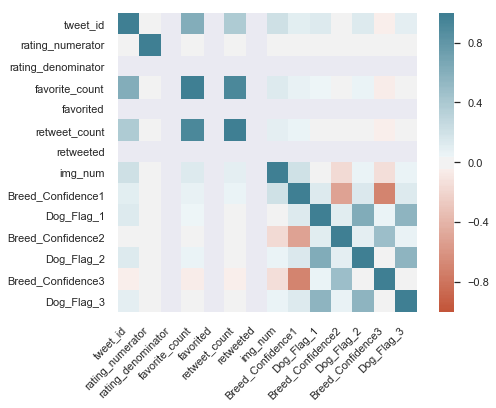

In [216]:
# From https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
# I'm leaving this in for information purposes since I lik
corr = twitter_archive_clean.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

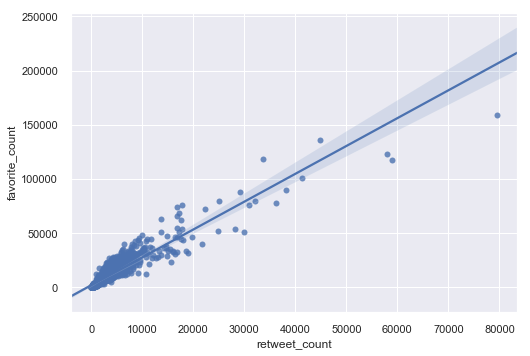

In [217]:
# See the correlation between retweet and favorite counts
# We see a strong linear relationship between retweet and favorite counts 
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_clean);

#### Analysis over time

Wanted to see how things change between retweet and favorite over time

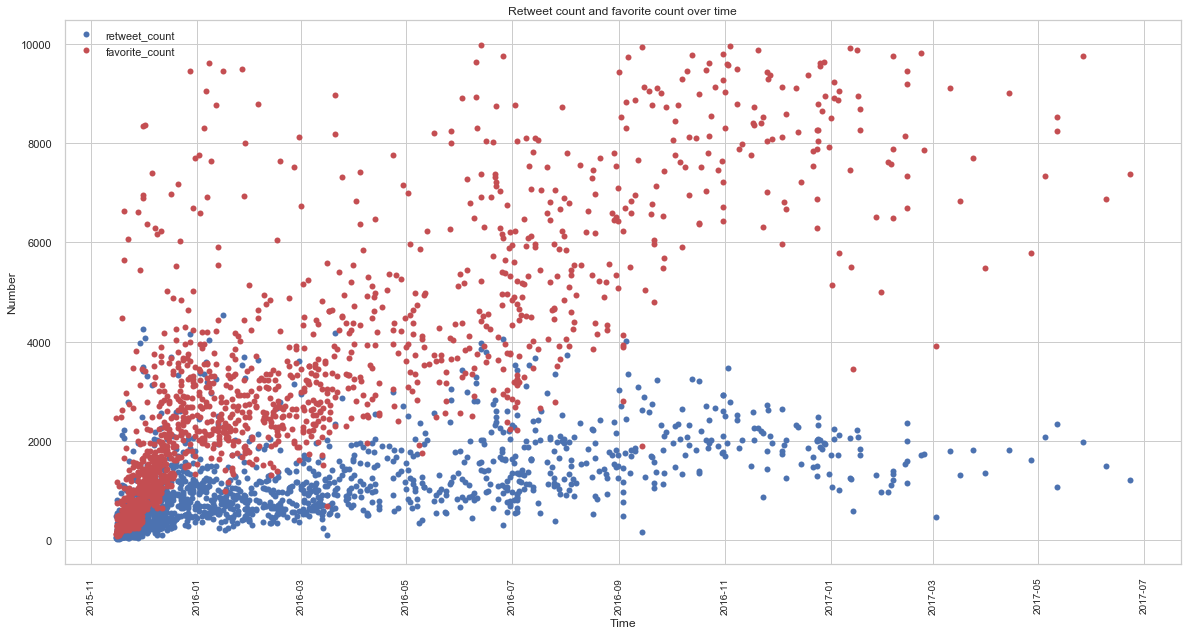

In [240]:
time = pd.to_datetime(twitter_archive_clean[twitter_archive_clean.favorite_count < 10000].timestamp).dt.date

fig, ax = plt.subplots(figsize=(20,10))
plt.plot_date(time,twitter_archive_clean[twitter_archive_clean.favorite_count < 10000].retweet_count)
plt.plot_date(time,twitter_archive_clean[twitter_archive_clean.favorite_count < 10000].favorite_count, color='r')
plt.xlabel('Time')
plt.ylabel('Number')
plt.title('Retweet count and favorite count over time')
plt.legend()
ax.xaxis.set_tick_params(rotation=90, labelsize=10)

### Some top 10 analysis

In [224]:
twitter_archive_clean['Breed_Probability1'].value_counts().head(10)

golden_retriever      135
Labrador_retriever    90 
Pembroke              88 
Chihuahua             79 
pug                   54 
chow                  41 
Samoyed               39 
Pomeranian            38 
toy_poodle            37 
malamute              29 
Name: Breed_Probability1, dtype: int64

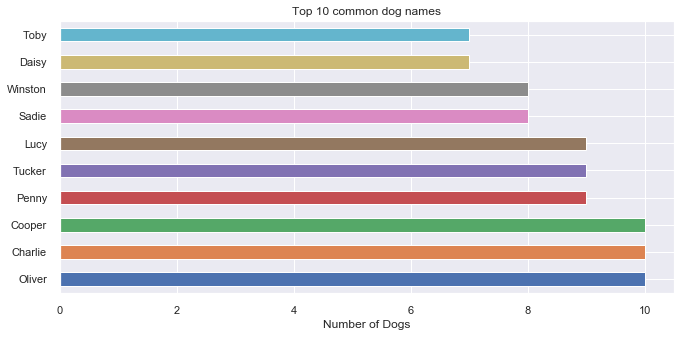

In [225]:
# Top 10 names, and start with index = 1 to avoid the "none" name
twitter_archive_clean.name.value_counts()[1:11].plot('barh', figsize=(11,5), title='Top 10 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

In [226]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1986
Data columns (total 25 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
expanded_urls         1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
stage                 305 non-null object
created_at            1969 non-null object
favorite_count        1969 non-null int64
favorited             1969 non-null bool
retweet_count         1969 non-null int64
retweeted             1969 non-null bool
jpg_url               1969 non-null object
img_num               1969 non-null int64
Breed_Probability1    1969 non-null object
Breed_Confidence1     1969 non-null float64
Dog_Flag_1            1969 non-null bool
Breed_Probability2    1969 non-null object
Breed_Confidence2     1969 non-null f

In [227]:
top10_breeds_count = twitter_archive_clean[twitter_archive_clean.Breed_Probability1 != 'none'].Breed_Probability1.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / twitter_archive_clean.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      135
Labrador_retriever    90 
Pembroke              88 
Chihuahua             79 
pug                   54 
chow                  41 
Samoyed               39 
Pomeranian            38 
toy_poodle            37 
malamute              29 
Name: Breed_Probability1, dtype: int64

Top 10 dog breeds make up 32% of all tweets


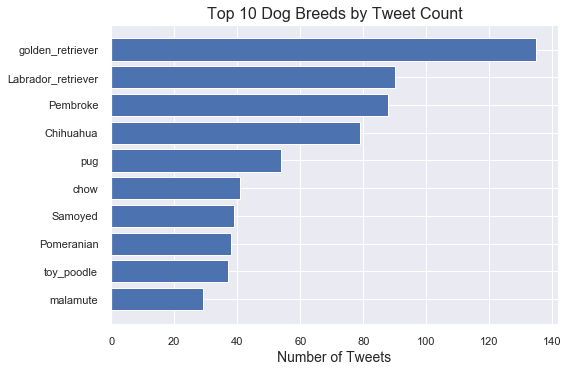

In [228]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

In [ ]:
# This isn't really a Top 10, but it was interesting to see how the "out of 10" scores looked

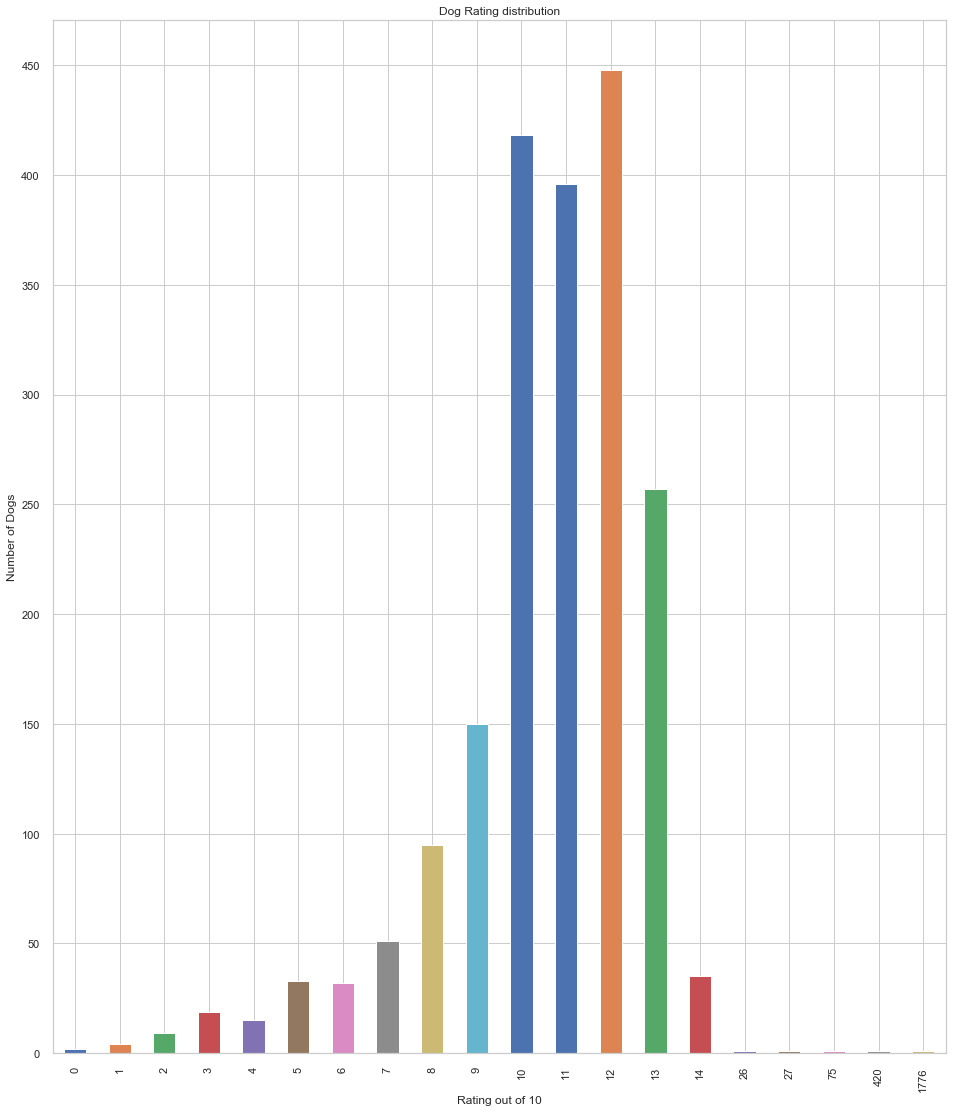

In [257]:
plt.figure(figsize=(16,19))
dog_rate = twitter_archive_clean.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
dog_rate.set_xlabel("Rating out of 10")
dog_rate.set_ylabel("Number of Dogs")
dog_rate.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450]);

#plt.savefig('rating_dist');


In [263]:
twitter_archive_clean['stage'].value_counts()

pupper          203
doggo           62 
puppo           22 
doggopupper     9  
floofer         7  
doggofloofer    1  
doggopuppo      1  
Name: stage, dtype: int64

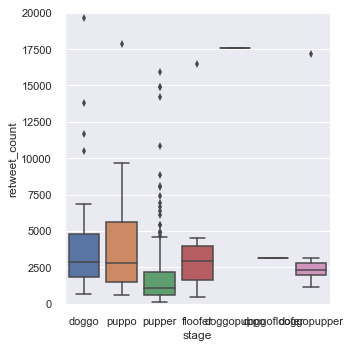

In [266]:
sns.set(rc={'figure.figsize':(20,20)})
ax = sns.catplot(x="stage",y="retweet_count",kind='box',data=twitter_archive_clean)
ax.set(ylim=(0, 20000))
#plt.savefig('Image\dog_Class_retweets.png')

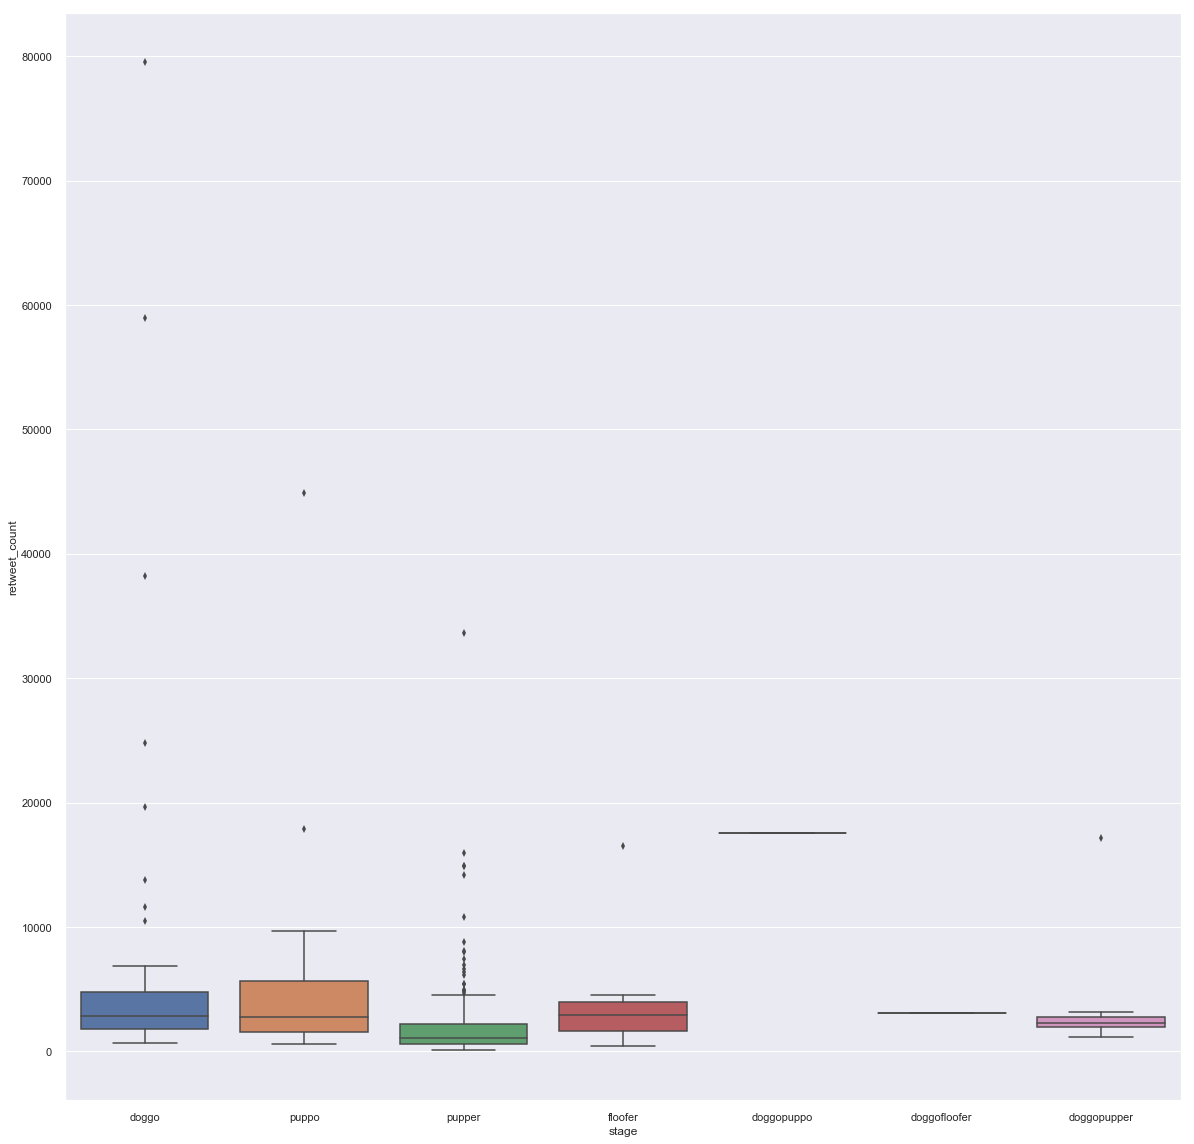

In [267]:
ax = sns.boxplot(x="stage", y="retweet_count", data=twitter_archive_clean)

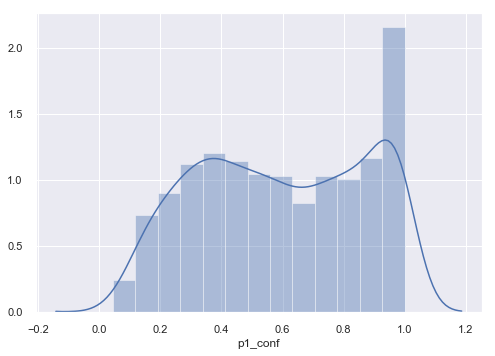

In [229]:
sns.set(style='darkgrid')
ax = sns.distplot(twi_pred_df['p1_conf'])

In [230]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1986
Data columns (total 25 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
expanded_urls         1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
stage                 305 non-null object
created_at            1969 non-null object
favorite_count        1969 non-null int64
favorited             1969 non-null bool
retweet_count         1969 non-null int64
retweeted             1969 non-null bool
jpg_url               1969 non-null object
img_num               1969 non-null int64
Breed_Probability1    1969 non-null object
Breed_Confidence1     1969 non-null float64
Dog_Flag_1            1969 non-null bool
Breed_Probability2    1969 non-null object
Breed_Confidence2     1969 non-null f

In [231]:
twitter_archive_clean['Breed_Probability1'].value_counts().head(10)

golden_retriever      135
Labrador_retriever    90 
Pembroke              88 
Chihuahua             79 
pug                   54 
chow                  41 
Samoyed               39 
Pomeranian            38 
toy_poodle            37 
malamute              29 
Name: Breed_Probability1, dtype: int64

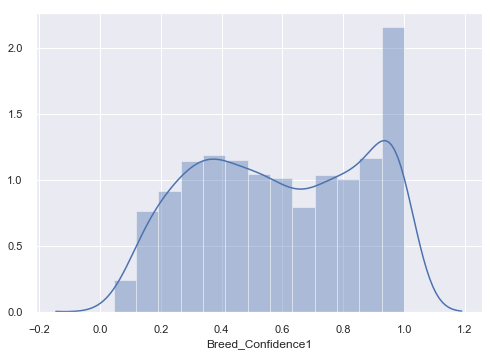

In [232]:
sns.set(style='darkgrid')
ax = sns.distplot(twitter_archive_clean['Breed_Confidence1'])

In [233]:
twitter_archive_clean['Breed_Probability2'].value_counts().head(10)

Labrador_retriever          96
golden_retriever            79
Cardigan                    72
Chihuahua                   41
Chesapeake_Bay_retriever    40
French_bulldog              39
Pomeranian                  39
toy_poodle                  35
Siberian_husky              33
miniature_poodle            32
Name: Breed_Probability2, dtype: int64

(-1.1083871596164592,
 1.119832302199839,
 -1.1185395665049542,
 1.109679895311344)

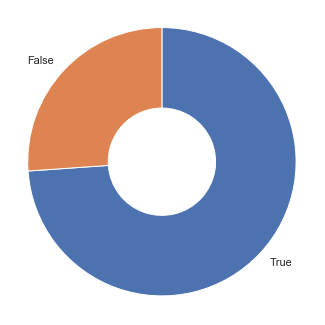

In [234]:
sns.set(style='darkgrid')
sorted_p1 = twitter_archive_clean['Dog_Flag_1'].value_counts()
plt.pie(sorted_p1, labels = sorted_p1.index, startangle = 90, counterclock = False,
       wedgeprops = {'width': 0.6})
plt.axis('square')

Text(0.5, 1.0, 'How does the rating affect the number of retweet counts?')

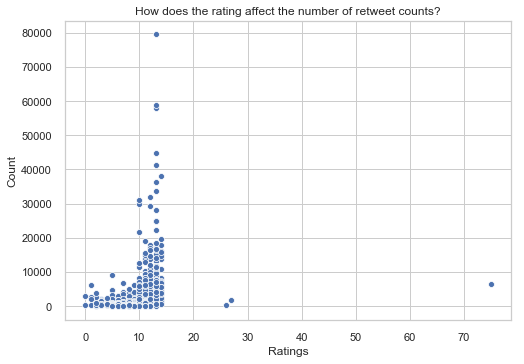

In [235]:
import seaborn as sns
sns.set_style('whitegrid')

# remove any ratings above 20
ratings = twitter_archive_clean[twitter_archive_clean['rating_numerator'] < 100]['rating_numerator']
count = twitter_archive_clean[twitter_archive_clean['rating_numerator'] < 100]['retweet_count']
sns.scatterplot(ratings,count)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('How does the rating affect the number of retweet counts?')

Text(0.5, 1.0, 'How does the rating affect the number of retweet counts?')

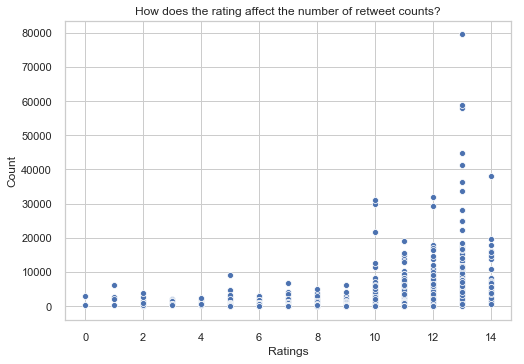

In [236]:
# remove any ratings above 20
ratings = twitter_archive_clean[twitter_archive_clean['rating_numerator'] < 15]['rating_numerator']
count = twitter_archive_clean[twitter_archive_clean['rating_numerator'] < 15]['retweet_count']
sns.scatterplot(ratings,count)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('How does the rating affect the number of retweet counts?')

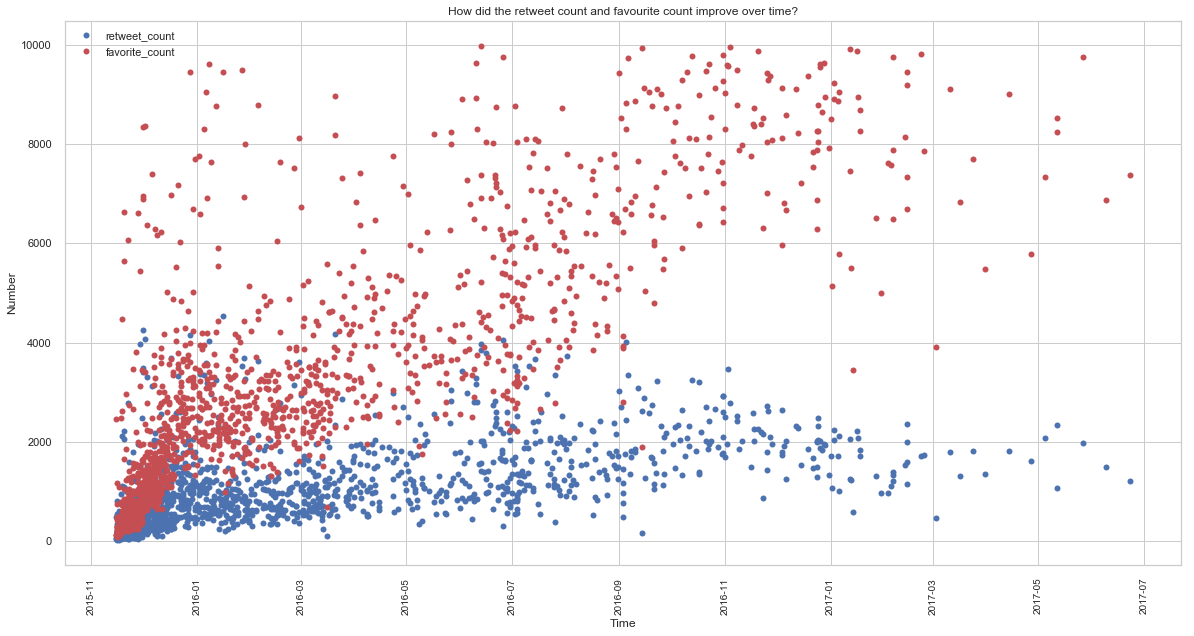

In [237]:
time = pd.to_datetime(twitter_archive_clean[twitter_archive_clean.favorite_count < 10000].timestamp).dt.date

fig, ax = plt.subplots(figsize=(20,10))
plt.plot_date(time,twitter_archive_clean[twitter_archive_clean.favorite_count < 10000].retweet_count)
plt.plot_date(time,twitter_archive_clean[twitter_archive_clean.favorite_count < 10000].favorite_count, color='r')
plt.xlabel('Time')
plt.ylabel('Number')
plt.title('How did the retweet count and favourite count improve over time?')
plt.legend()
ax.xaxis.set_tick_params(rotation=90, labelsize=10)

In [ ]:
twitter_archive_clean.info()

In [ ]:
tweet = twitter_archive_clean[twitter_archive_clean.Breed_Confidence1 == 1.0]
tweet